In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
root_path="/tf/home/sergio/Tesis"

In [3]:
def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.
    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end

    mrec = np.concatenate(([0.], recall, [1.]))
    mpre = np.concatenate(([0.], precision, [0.]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [4]:
os.chdir(root_path)
os.listdir()

['detections_df_best_result_2_anchors',
 'confusion_matrix_best_2_anchors',
 'json_final_experiment',
 'Atropellan a 7 peatones al día en la CDMX.mp4',
 'ap_results.png',
 'pedestrian_dataset_val_tfr_fixed',
 '.ipynb_checkpoints',
 'detections_df_original',
 'ap_results',
 'COCODataset',
 'yolo_darknet',
 'training_2',
 'confusion_matrix_original',
 'weights_transfer_learning',
 'training_3',
 'VOC2012',
 'weights_saved',
 'pedestrian_dataset_train_tfr',
 'training_1',
 'Madeo_peatones.mp4',
 'confusion_matrix_best_3_anchors',
 'imagenes_estudio_caso',
 'detections_df_best_result_3_anchors',
 'training_4',
 'TinyYOLOv3-Pedestrian-Detection',
 'last_weights']

In [5]:
best_3_anchors_df = pd.read_csv("detections_df_best_result_3_anchors").iloc[:,2:]
best_2_anchors_df = pd.read_csv("detections_df_best_result_2_anchors").iloc[:,2:]
original_df = pd.read_csv("detections_df_original").iloc[:,2:]

In [6]:
best_3_anchors_df

,xmin,ymin,xmax,ymax,score,xy_error,wh_error,TP,FP,iou,cum TP,cum FP,Precision,Recall
0,0.743972,0.339459,0.857438,0.746418,0.999998,0.000718,0.002778,1,0,0.747773,1,0,1.000000,0.000091
1,0.480169,0.006170,0.618323,0.386322,0.999948,0.000750,0.000032,1,0,0.660039,2,0,1.000000,0.000182
2,0.581002,0.263253,0.703770,0.741898,0.999923,0.000004,0.000205,1,0,0.935711,3,0,1.000000,0.000273
3,0.813451,0.312248,0.960474,0.659337,0.999903,0.000055,0.000083,1,0,0.899746,4,0,1.000000,0.000364
4,0.355499,0.170107,0.511371,0.533397,0.999898,0.000351,0.002991,1,0,0.678627,5,0,1.000000,0.000454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,0.388805,0.236340,0.424325,0.357725,0.500512,0.000344,0.003302,0,1,0.321055,2893,1395,0.674673,0.262904
4288,0.291121,0.169906,0.578895,0.869067,0.500449,0.001453,0.001689,1,0,0.796074,2894,1395,0.674749,0.262995
4289,0.455849,0.162589,0.483670,0.235058,0.500250,0.000051,0.000044,1,0,0.536381,2895,1395,0.674825,0.263086
4290,0.749914,0.749281,0.763947,0.794428,0.500231,0.000133,0.000096,0,1,0.201625,2895,1396,0.674668,0.263086


In [7]:
best_3_ap = compute_ap(best_3_anchors_df["Recall"].values, best_3_anchors_df["Precision"].values)
best_2_ap = compute_ap(best_2_anchors_df["Recall"].values, best_2_anchors_df["Precision"].values)
original_ap = compute_ap(original_df["Recall"].values, original_df["Precision"].values)

In [8]:
os.getcwd()

'/tf/home/sergio/Tesis'

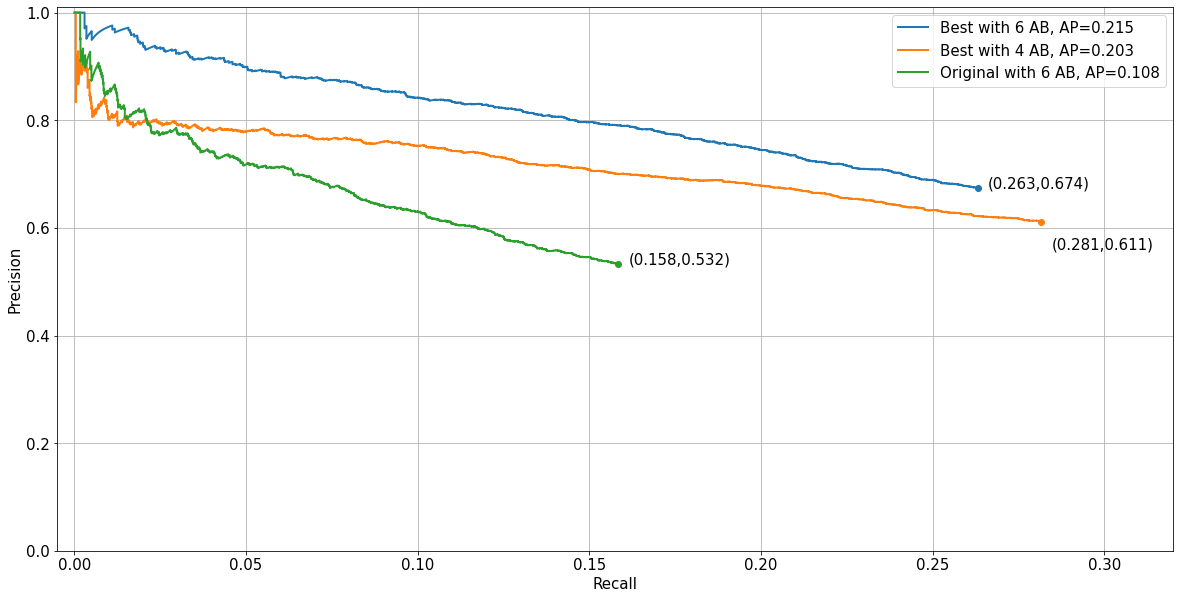

In [9]:
from matplotlib import rcParams
import matplotlib
import matplotlib.colors as mcolors

rcParams['figure.figsize'] = 20, 10

font = {'size'   : 15}

matplotlib.rc('font', **font)

coord_3 =[best_3_anchors_df.Recall.iloc[-1],best_3_anchors_df.Precision.iloc[-1]]
coord_2 =[best_2_anchors_df.Recall.iloc[-1],best_2_anchors_df.Precision.iloc[-1]]
coord_o =[original_df.Recall.iloc[-1],original_df.Precision.iloc[-1]]

plt.plot(best_3_anchors_df.Recall,best_3_anchors_df.Precision, label = "Best with 6 AB, AP={0:.3f}".format(best_3_ap),linewidth=2)
plt.plot(best_2_anchors_df.Recall,best_2_anchors_df.Precision, label = "Best with 4 AB, AP={0:.3f}".format(best_2_ap),linewidth=2)
plt.plot(original_df.Recall,original_df.Precision, label = "Original with 6 AB, AP={0:.3f}".format(original_ap),linewidth=2)

plt.text(coord_3[0]+0.003,coord_3[1],s="("+str(coord_3[0])[:5] + "," +  str(coord_3[1])[:5] + ")" )
plt.text(coord_2[0]+0.003,coord_2[1]-0.05,s="("+str(coord_2[0])[:5] + "," +  str(coord_2[1])[:5] + ")" )
plt.text(coord_o[0]+0.003,coord_o[1],s="("+str(coord_o[0])[:5] + "," +  str(coord_o[1])[:5] + ")" )

plt.plot(best_3_anchors_df.Recall.iloc[-1],best_3_anchors_df.Precision.iloc[-1],'o',color=mcolors.TABLEAU_COLORS["tab:blue"])
plt.plot(best_2_anchors_df.Recall.iloc[-1],best_2_anchors_df.Precision.iloc[-1],'o',color=mcolors.TABLEAU_COLORS["tab:orange"])
plt.plot(original_df.Recall.iloc[-1],original_df.Precision.iloc[-1],'o',color=mcolors.TABLEAU_COLORS["tab:green"])

plt.grid()
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([-0.005,0.32])
plt.ylim([0,1.01])
plt.title("")

plt.savefig("ap_results",format="png",dpi=200)

In [10]:
os.listdir()

['detections_df_best_result_2_anchors',
 'confusion_matrix_best_2_anchors',
 'json_final_experiment',
 'Atropellan a 7 peatones al día en la CDMX.mp4',
 'ap_results.png',
 'pedestrian_dataset_val_tfr_fixed',
 '.ipynb_checkpoints',
 'detections_df_original',
 'ap_results',
 'COCODataset',
 'yolo_darknet',
 'training_2',
 'confusion_matrix_original',
 'weights_transfer_learning',
 'training_3',
 'VOC2012',
 'weights_saved',
 'pedestrian_dataset_train_tfr',
 'training_1',
 'Madeo_peatones.mp4',
 'confusion_matrix_best_3_anchors',
 'imagenes_estudio_caso',
 'detections_df_best_result_3_anchors',
 'training_4',
 'TinyYOLOv3-Pedestrian-Detection',
 'last_weights']

## CONFUSION MATRIX

In [13]:
total_objects = 11004
total_no_objects = 2693*2535 - total_objects

In [46]:
def get_confusion_matrix(results_df):

    TP = results_df["cum TP"].iloc[-1]
    FP =  results_df["cum FP"].iloc[-1]
    FN = total_objects - TP
    TN = total_no_objects - FP

    conf_matrix = np.array([[TP,FN],[FP,TN]])
    print(conf_matrix)
    print(conf_matrix.sum())
    #conf_matrix=np.divide(conf_matrix,conf_matrix.sum(axis=0))
    
    return conf_matrix

In [47]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [48]:
import seaborn as sn
import pandas as pd

sn.set(font_scale=1.3)

[[   1744    9260]
 [   1529 6814222]]
6826755


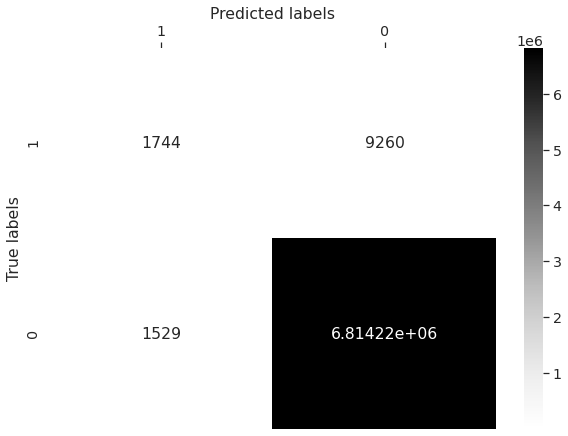

In [53]:
from matplotlib.colors import ListedColormap


conf_matrix = get_confusion_matrix(original_df)


plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

df_cm = pd.DataFrame(conf_matrix, index = [i for i in "10"],
                  columns = [i for i in "10"])
plt.figure(figsize = (10,7))
plot = sn.heatmap(df_cm, annot=True,cmap="Greys", fmt='g')#,xticklabels=["Predicted labels"], yticklabels=["True labels"])

plot.xaxis.tick_top()
plot.set_ylabel("True labels",)
plot.set_title("Predicted labels")

plt.savefig("confusion_matrix_original",dpi=200,format="png")